# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/Data/CLV.csv")

In [ ]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [ ]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,),(10,100,10,)], 
    "activation" : ['relu','tanh','logistic'],
    "alpha":[0.0001,0.001,0.01]
}

In [ ]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10,), (20, 5), (10, 100, 10)]})

In [ ]:
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 100, 10)}


# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
regressor = MLPRegressor(hidden_layer_sizes = (10,100,10), activation = "relu",alpha=0.0001)
regressor.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 100, 10))

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred_in = regressor.predict(X_train)
y_pred_out = regressor.predict(X_test)

in_mse=mean_squared_error(y_train,y_pred_in)
out_mse=mean_squared_error(y_test,y_pred_out)

In [ ]:
print("in sample MSE is:",in_mse)
print("out of sample MSE is:",out_mse)

in sample MSE is: 43050703.7756479
out of sample MSE is: 43094884.20877389


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from os import X_OK
model = Sequential()
model.add(Dense(10,input_dim=X_train.shape[1],activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(10,activation="relu"))

In [ ]:
model.compile(loss="mse",optimizer=Adam(lr=0.0001))
model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


200/200 [==============================] - 1s 2ms/step - loss: 111600448.0000
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 111586800.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 111556192.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 111496984.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 111400480.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 111260968.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 111075456.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 110840024.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 110552600.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 110209976.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 109808624.0000
Epoch 12/100
200/200

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [ ]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, title="My ANN Model", filename="/content/gdrive/MyDrive/Econ441B/Data/ann_model.dot")

In [ ]:
import pydot
(graph,) = pydot.graph_from_dot_file('/content/gdrive/MyDrive/Econ441B/Data/ann_model.dot')
graph.write_png('/content/gdrive/MyDrive/Econ441B/Data/ann_model.png')

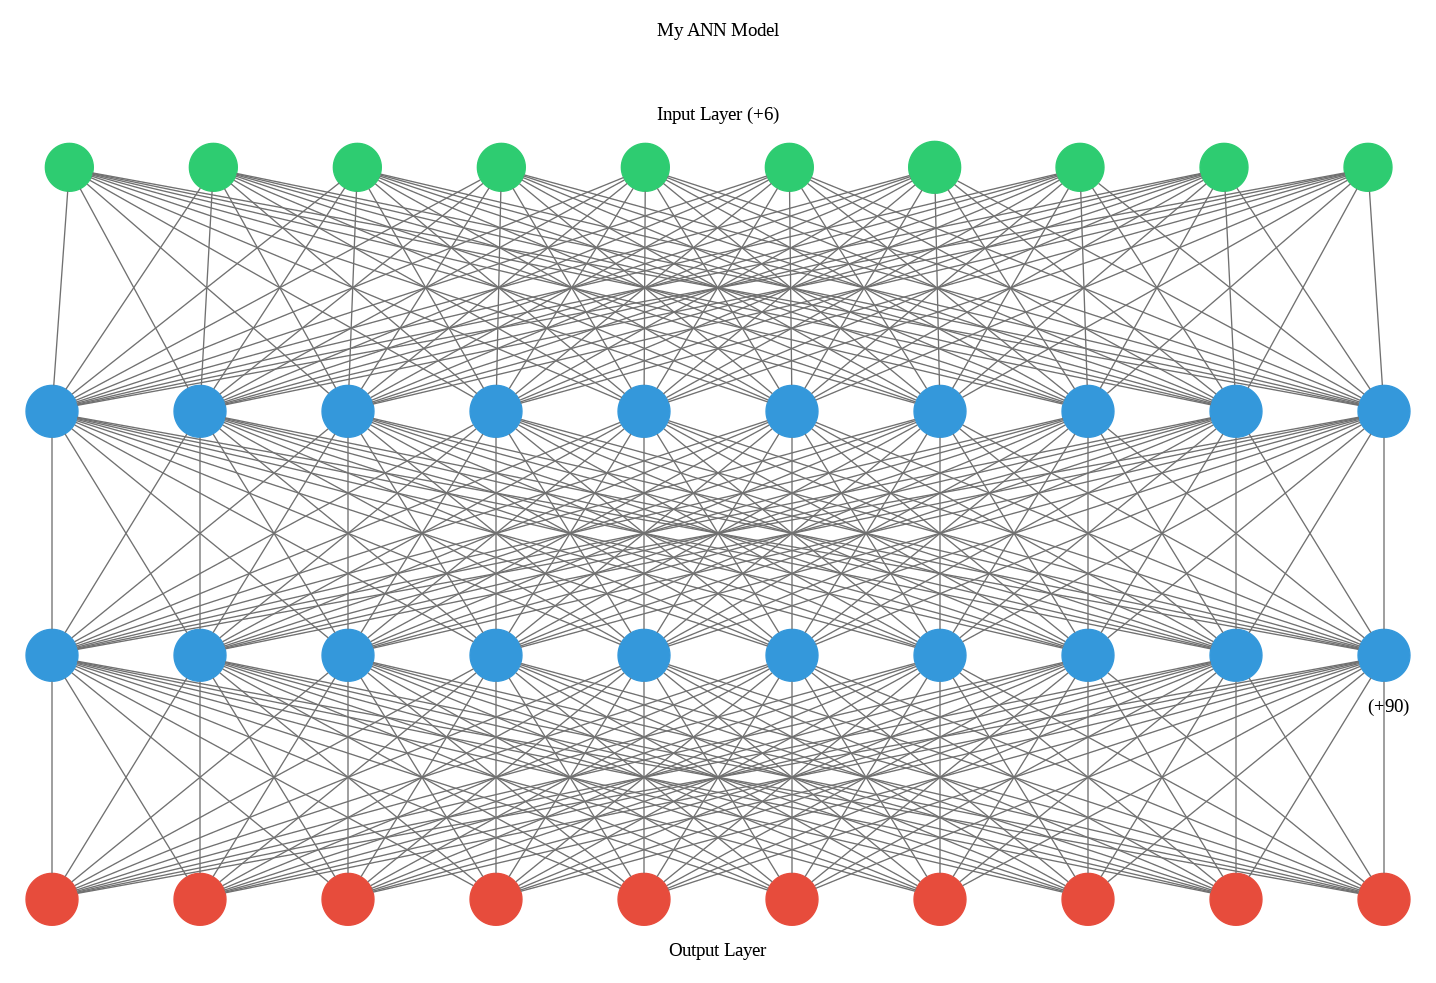

In [ ]:
from IPython.display import Image

Image(filename='/content/gdrive/MyDrive/Econ441B/Data/ann_model.png')

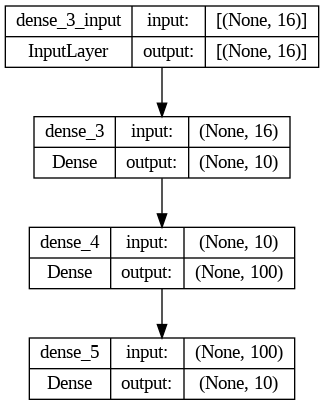

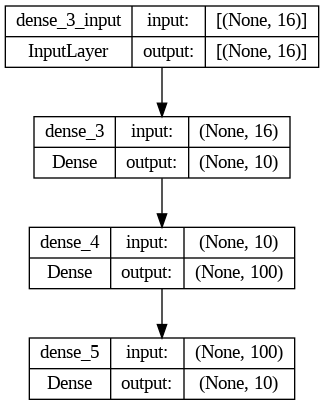

In [97]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)